In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import pandas_profiling
import matplotlib.pyplot as plt

from numpy import random

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
data = pd.read_csv("../input/train.csv")

In [4]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
len(data)

200000

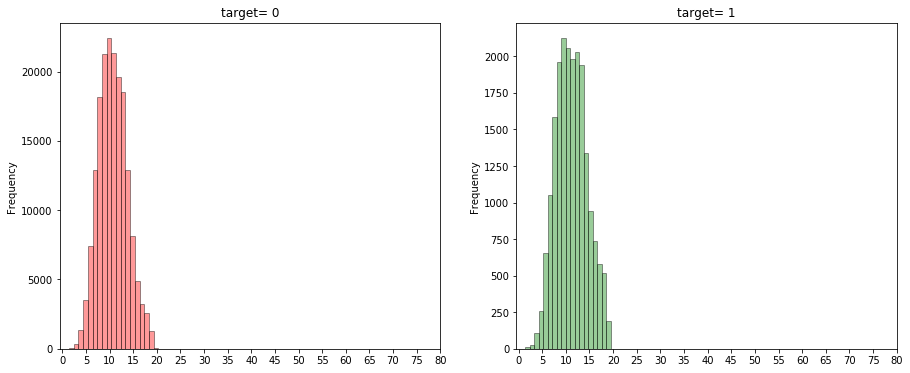

In [8]:
f,ax=plt.subplots(1,2,figsize=(15,6))
data[data['target']==0].var_0.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red', alpha=0.4)
ax[0].set_title('target= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['target']==1].var_0.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black', alpha=0.4)
ax[1].set_title('target= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

* Let this be the population
* Draw a sample of 500
* Estimate the parameters
* What is the population parameters of var_0
* Can we create a 95% confidence interval for the mean from the sample?

In [9]:
# generate 500 random indices

sample_indices = [random.randint(0,len(data)) for i in range(500)]
random_sample = data.iloc[sample_indices]

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


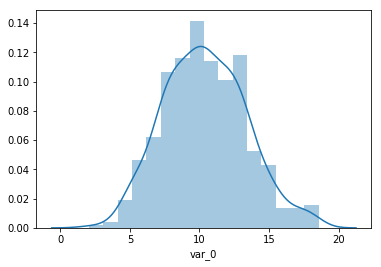

In [10]:
#random_sample.var_0.hist(alpha=0.5)
sns.distplot(random_sample.var_0)

In [14]:
hist, bin_edges = np.histogram(random_sample.var_0, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

In [19]:
# Sample Mean - Fit a normal curve onto this distribution


from scipy.optimize import curve_fit



def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


p0 = [0.016, 10., 5.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

In [22]:
A, mean, sd = coeff
A, mean, sd

(0.13100895567266732, 10.209056773835961, 3.078709287477581)

- __Estimated population mean:  10.2__
- __Estimated population variance:  3.078__

95% confidence interval of the mean

In [ ]:
X' +- t